**Load the dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('COVID_Parcel_Business.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get information about the dataframe
print(df.info())

# Summary statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME
0          718117      2021         1       8
1          718117      2020         7     257
2          718117      2019        39     141
3          718117      2018         1      14
4          718117      2021         2     192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB
None
       FakeCustomerID       THE_YEAR       THE_WEEK         VOLUME
count   190719.000000  190719.000000  190719.000000  190719.000000
mean    541440.234963    2019.395220      25.676377    1174.911519
std     264861.365663       1.068845      14.722539   11586.730666
min     100771.000000    2018.000000   

This code will load the dataset into a pandas DataFrame, display the first few rows, provide information about the dataframe (e.g., data types of columns), display summary statistics for numerical columns, and check for missing values in the dataset.

**Parcel volume Before and After Covid**

<ipython-input-8-4f23dc967e30>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['date'] = pd.to_datetime(df_2020['THE_YEAR'].astype(str) + '-' + df_2020['THE_WEEK'].astype(str) + '-1', format='%Y-%W-%w')


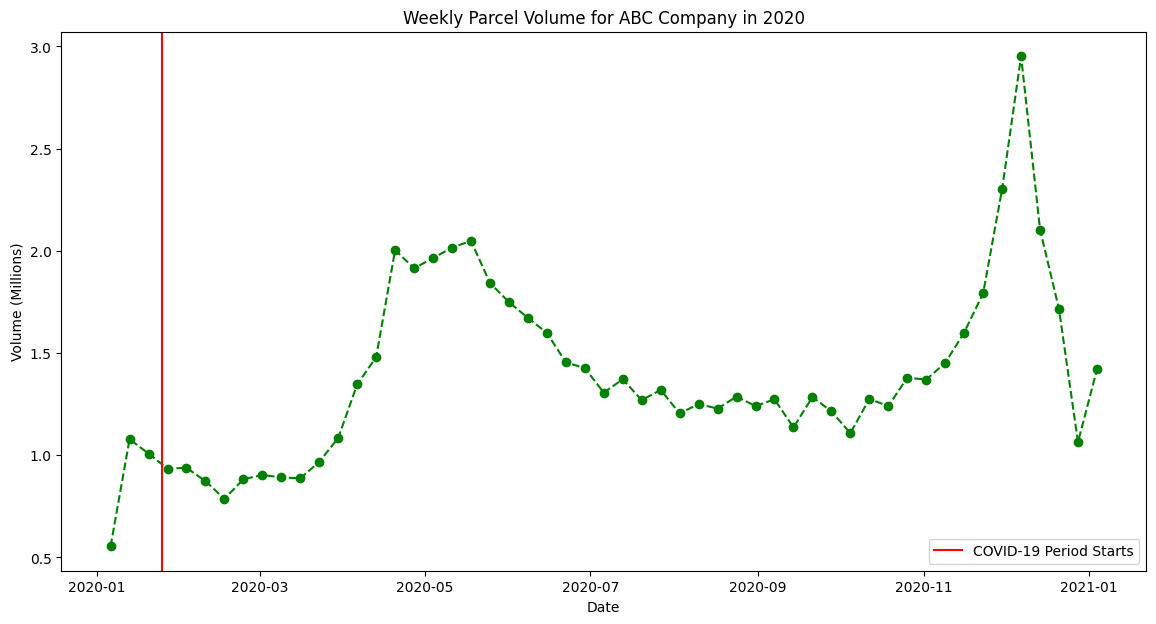

Total Parcel Volume Before COVID in 2020: 2.641452 Millions
Total Parcel Volume After COVID in 2020: 69.4143 Millions


In [8]:
import matplotlib.pyplot as plt

# Filter data for the year 2020 only
df_2020 = df[df['THE_YEAR'] == 2020]

# Ensure the data types are correct
df_2020['date'] = pd.to_datetime(df_2020['THE_YEAR'].astype(str) + '-' + df_2020['THE_WEEK'].astype(str) + '-1', format='%Y-%W-%w')

# Aggregate total weekly volumes
weekly_volumes = df_2020.groupby(['date'])['VOLUME'].sum().reset_index()

# Define Pre-COVID and During-COVID Periods
before_covid_volume = weekly_volumes[weekly_volumes['date'] < '2020-01-25']['VOLUME'].sum() / 1000000  # Convert to millions
after_covid_volume = weekly_volumes[(weekly_volumes['date'] >= '2020-01-25') & (weekly_volumes['date'] <= '2020-12-31')]['VOLUME'].sum() / 1000000  # Convert to millions

# Visual Analysis of Parcel Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(weekly_volumes['date'], weekly_volumes['VOLUME'] / 1000000, marker='o', linestyle='--', color='g')  # Convert to millions
plt.title('Weekly Parcel Volume for ABC Company in 2020')
plt.xlabel('Date')
plt.ylabel('Volume (Millions)')  # Update ylabel
plt.axvline(x=pd.to_datetime('2020-01-25'), color='r', linestyle='-', label='COVID-19 Period Starts')
#plt.axvline(x=pd.to_datetime('2020-04-27'), color='r', linestyle='--', label='COVID-19 Period Starts')
plt.legend()
plt.show()

# Compare Volumes Pre-COVID and During-COVID
print(f"Total Parcel Volume Before COVID in 2020: {before_covid_volume} Millions")
print(f"Total Parcel Volume After COVID in 2020: {after_covid_volume} Millions")


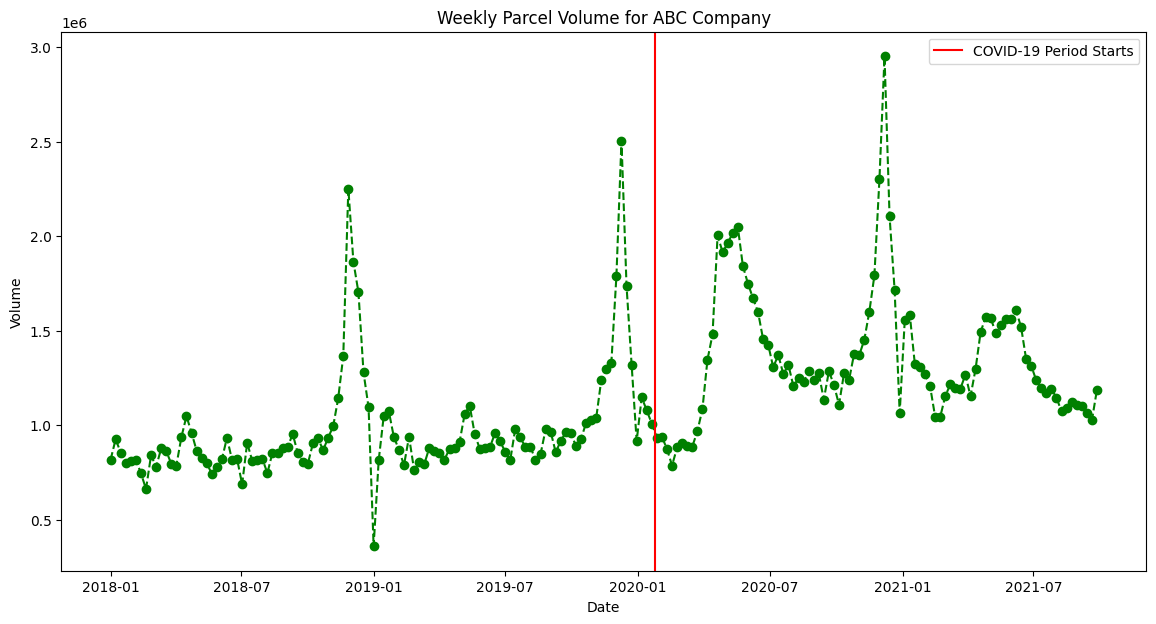

Total Parcel Volume Before COVID: 104564044
Total Parcel Volume After COVID: 69414300


In [2]:
import matplotlib.pyplot as plt

# Ensure the data types are correct
df['date'] = pd.to_datetime(df['THE_YEAR'].astype(str) + '-' + df['THE_WEEK'].astype(str) + '-1', format='%Y-%W-%w')

# Aggregate total weekly volumes
weekly_volumes = df.groupby(['date'])['VOLUME'].sum().reset_index()

# Define Pre-COVID and During-COVID Periods
before_covid_volume = weekly_volumes[weekly_volumes['date'] < '2020-01-25']['VOLUME'].sum()
after_covid_volume = weekly_volumes[(weekly_volumes['date'] >= '2020-01-25') & (weekly_volumes['date'] <= '2020-12-31')]['VOLUME'].sum()

# Visual Analysis of Parcel Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(weekly_volumes['date'], weekly_volumes['VOLUME'], marker='o', linestyle='--', color='g')
plt.title('Weekly Parcel Volume for ABC Company')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(x=pd.to_datetime('2020-01-25'), color='r', linestyle='-', label='COVID-19 Period Starts')
#plt.axvline(x=pd.to_datetime('2020-04-27'), color='r', linestyle='--', label='COVID-19 Period Starts')
plt.legend()
plt.show()

#Compare Volumes Pre-COVID and During-COVID
print(f"Total Parcel Volume Before COVID: {before_covid_volume}")
print(f"Total Parcel Volume After COVID: {after_covid_volume}")

The visualization helps in understanding how the parcel volume for ABC Company fluctuates over time, with a focus on the impact of the COVID-19 period. The comparison of parcel volumes before and after COVID-19 provides insights into the changes in business operations or customer behavior during the pandemic.

**When were customer volumes first impacted by COVID-19?**

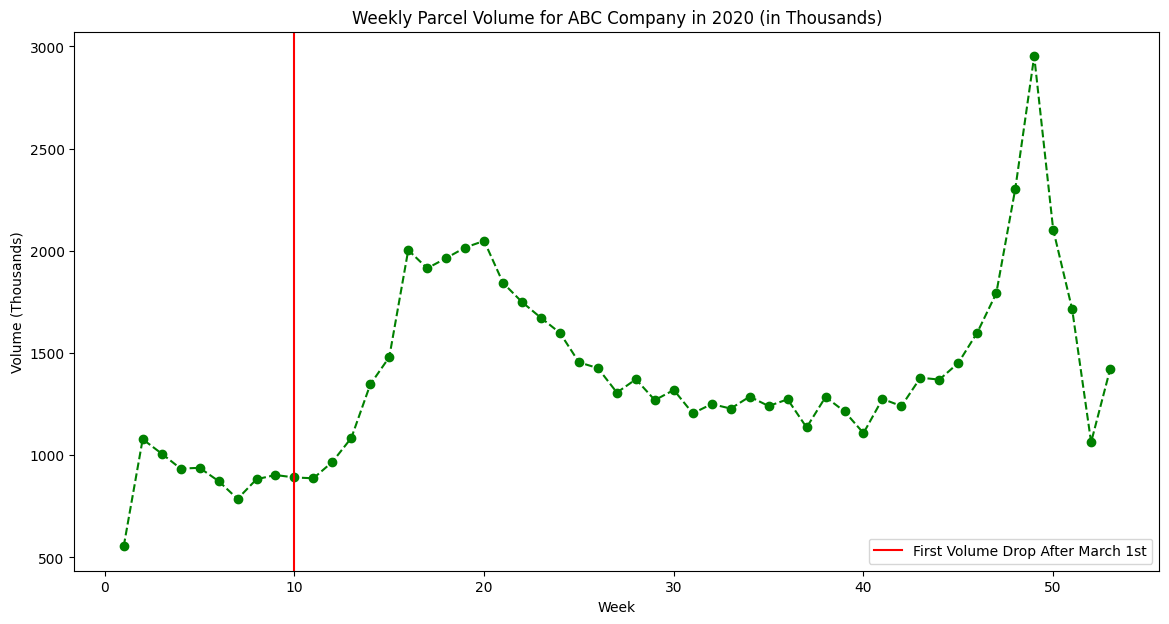

In [14]:
import matplotlib.pyplot as plt
# Filter data for 2020
df_2020 = df[df['THE_YEAR'] == 2020]

# Group by week and sum the volume
weekly_volumes_2020 = df_2020.groupby(['THE_WEEK'])['VOLUME'].sum().reset_index()

# Convert volume to thousands
weekly_volumes_2020['VOLUME'] = weekly_volumes_2020['VOLUME'] / 1000

# Find the first week with a volume drop after March 1st
first_drop_week = weekly_volumes_2020[(weekly_volumes_2020['VOLUME'] < weekly_volumes_2020['VOLUME'].shift(1)) & (weekly_volumes_2020['THE_WEEK'] > 10)].index[0]

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(weekly_volumes_2020['THE_WEEK'], weekly_volumes_2020['VOLUME'], marker='o', linestyle='--', color='g')
plt.title('Weekly Parcel Volume for ABC Company in 2020 (in Thousands)')
plt.xlabel('Week')
plt.ylabel('Volume (Thousands)')

# Add vertical line at the first drop week
plt.axvline(x=first_drop_week, color='r', linestyle='-', label='First Volume Drop After March 1st')

# Add legend and show plot
plt.legend()
plt.show()

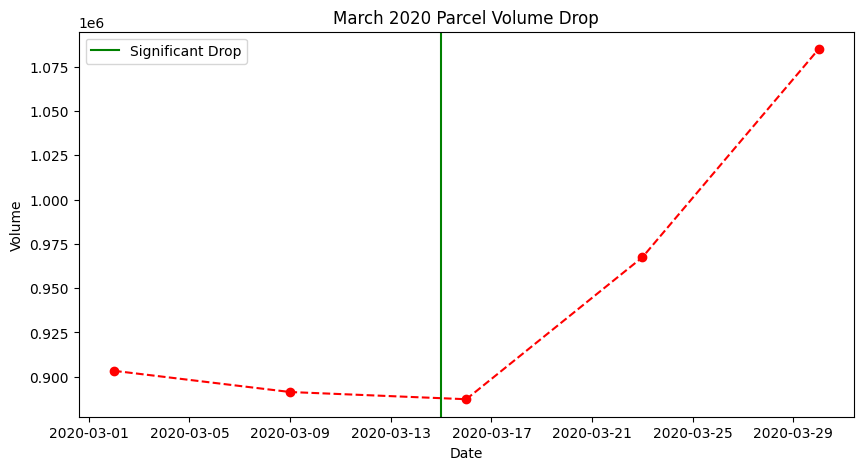

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot March 2020 Parcel Volume Drop
march_2020_volumes = weekly_volumes[(weekly_volumes['date'] >= '2020-03-01') & (weekly_volumes['date'] <= '2020-03-31')]

plt.figure(figsize=(10, 5))
plt.plot(march_2020_volumes['date'], march_2020_volumes['VOLUME'], marker='o', linestyle='--', color='r')
plt.title('March 2020 Parcel Volume Drop')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(x=pd.to_datetime('2020-03-15'), color='g', linestyle='-', label='Significant Drop')
plt.legend()
plt.show()

**What events within the COVID timeline may have contributed to the change?**

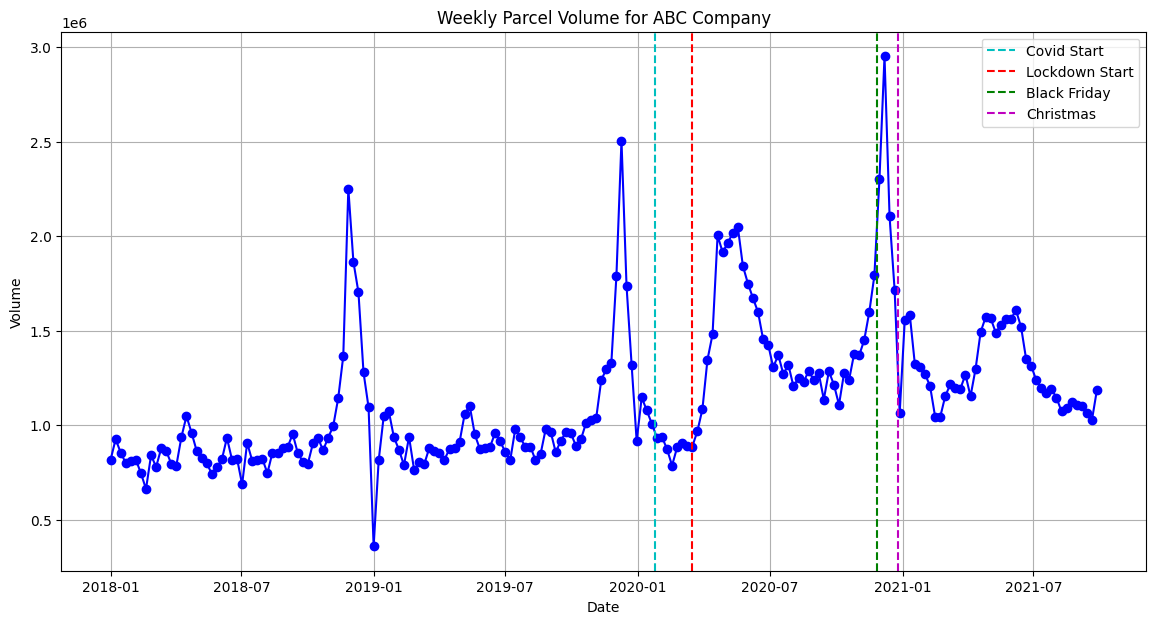

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('COVID_Parcel_Business.csv')

# Ensure the data types are correct
df['date'] = pd.to_datetime(df['THE_YEAR'].astype(str) + '-' + df['THE_WEEK'].astype(str) + '-1', format='%Y-%W-%w')

# Aggregate total weekly volumes
weekly_volumes = df.groupby(['date'])['VOLUME'].sum().reset_index()

# Visualize Parcel Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(weekly_volumes['date'], weekly_volumes['VOLUME'], marker='o', linestyle='-', color='b')
plt.title('Weekly Parcel Volume for ABC Company')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

# Add vertical lines or markers for potential COVID-19 events
# Modify this part based on known events or data sources
plt.axvline(x=pd.to_datetime('2020-01-25'), color='c', linestyle='--', label='Covid Start')
plt.axvline(x=pd.to_datetime('2020-03-15'), color='r', linestyle='--', label='Lockdown Start')
plt.axvline(x=pd.to_datetime('2020-11-27'), color='g', linestyle='--', label='Black Friday')
plt.axvline(x=pd.to_datetime('2020-12-25'), color='m', linestyle='--', label='Christmas')


plt.legend()
plt.show()


In this code:

We load the dataset and convert the date columns to datetime format.
We aggregate the total weekly parcel volumes.
We visualize the parcel volume data over time using a line plot.
We add vertical lines or markers for potential COVID-19 events such as the start of lockdowns, Black Friday, and Christmas. You can modify this part based on known events or data sources relevant to your analysis.
By inspecting the plot, you can observe any notable changes or patterns in parcel volumes and identify potential events within the COVID timeline that may have contributed to these changes. Adjust the plot and event markers as needed based on your domain knowledge and available data.

Lockdown Measures: The implementation of lockdown measures, such as stay-at-home orders and non-essential business closures, could lead to a decrease in consumer spending and online shopping, resulting in lower parcel shipping volumes.

Supply Chain Disruptions: Disruptions in global supply chains due to factory closures, transportation restrictions, and border closures could lead to delays in shipping and reduced availability of products for shipping, impacting parcel volumes.

Consumer Behavior Changes: Changes in consumer behavior, such as reduced discretionary spending, hesitation to make non-essential purchases, and a shift towards purchasing essential items only, could result in decreased demand for parcel shipping services.

Economic Uncertainty: Economic uncertainty and job losses resulting from the pandemic could lead to decreased consumer confidence and reduced purchasing power, resulting in lower demand for shipped goods and, consequently, lower parcel shipping volumes.

Business Closures: Closure of businesses, particularly small and medium-sized enterprises (SMEs), could lead to a decrease in commercial parcel shipping volumes as fewer businesses are operational and shipping goods.

Reduced Cross-Border Trade: Restrictions on international travel and trade, as well as increased border controls, could lead to a reduction in cross-border trade and shipping volumes.

Health and Safety Concerns: Concerns about the spread of COVID-19 and potential contamination of packages could lead to decreased consumer willingness to order goods online and have them shipped, especially during the early stages of the pandemic.

Logistical Challenges: Logistics and operational challenges faced by shipping companies, such as workforce shortages, increased sanitation protocols, and transportation disruptions, could result in delays and reduced capacity for parcel shipping.

These factors, either individually or in combination, could contribute to a drop in parcel shipping volumes after the onset of COVID-19 in Canada, particularly after January 25, 2020. Understanding the specific circumstances and dynamics of the Canadian market would provide further insights into the reasons for the decrease in parcel shipping volumes during this period.




**How did COVID-19 impact peak season in 2020?**

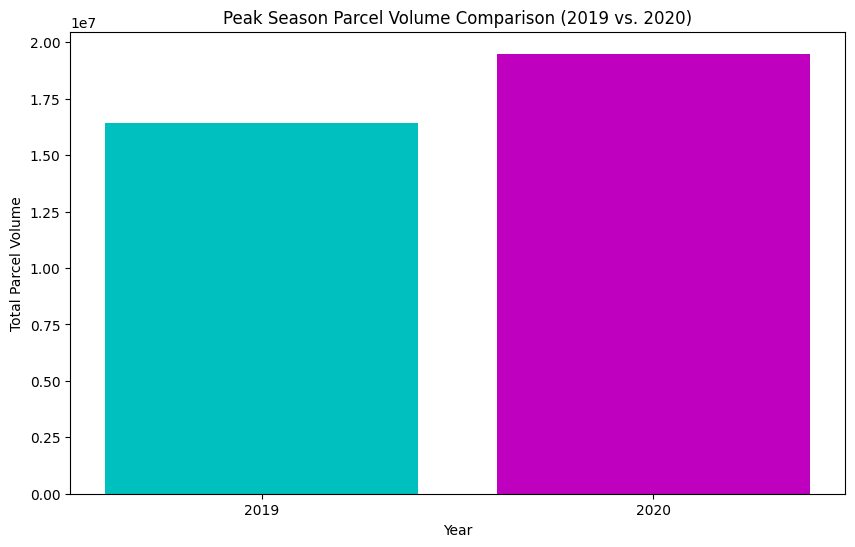

Percentage Change in Parcel Volume from 2019 to 2020: 18.77%


In [17]:
# Step 1: Define the peak season period for 2020

peak_season_start_2020 = pd.to_datetime('2020-11-02')
peak_season_end_2020 = pd.to_datetime('2021-01-17')

# Step 2: Load the dataset and filter data for the peak season of 2020
df = pd.read_csv('COVID_Parcel_Business.csv')
df['date'] = pd.to_datetime(df['THE_YEAR'].astype(str) + '-' + df['THE_WEEK'].astype(str) + '-1', format='%Y-%W-%w')
peak_season_2020_df = df[(df['date'] >= peak_season_start_2020) & (df['date'] <= peak_season_end_2020)]

# Aggregate parcel volumes for the peak season of 2020
peak_season_2020_volume = peak_season_2020_df['VOLUME'].sum()

# Step 3: Compare parcel volumes with previous years
# Load data for previous years (e.g., 2019)
# Assuming the dataset contains parcel volumes for multiple years

# Aggregate parcel volumes for the peak season of 2019
peak_season_start_2019 = pd.to_datetime('2019-11-04')
peak_season_end_2019 = pd.to_datetime('2020-01-20')
peak_season_2019_df = df[(df['date'] >= peak_season_start_2019) & (df['date'] <= peak_season_end_2019)]
peak_season_2019_volume = peak_season_2019_df['VOLUME'].sum()

# Step 4: Visualize the parcel volume trend during the peak season
plt.figure(figsize=(10, 6))
plt.bar(['2019', '2020'], [peak_season_2019_volume, peak_season_2020_volume], color=['c', 'm'])
plt.title('Peak Season Parcel Volume Comparison (2019 vs. 2020)')
plt.xlabel('Year')
plt.ylabel('Total Parcel Volume')
plt.show()

# Additional analysis can include percentage change, year-over-year comparison, etc.
percentage_change = ((peak_season_2020_volume - peak_season_2019_volume) / peak_season_2019_volume) * 100
print(f"Percentage Change in Parcel Volume from 2019 to 2020: {percentage_change:.2f}%")

The comparison assess the company's performance during the peak seasons of both years. A higher parcel volume in 2020 during covid time compared to 2019.

In [18]:
#Find the count of customers in 2019 and 2020

unique_customer_count_2019 = df[df['THE_YEAR'] == 2019]['FakeCustomerID'].nunique()
print(f"Number of unique customers in 2019: {unique_customer_count_2019}")

unique_customer_count_2020 = df[df['THE_YEAR'] == 2020]['FakeCustomerID'].nunique()
print(f"Number of unique customers in 2020: {unique_customer_count_2020}")

Number of unique customers in 2019: 1061
Number of unique customers in 2020: 1046


It can find and compare the number of unique customers in the dataset for the years 2019 and 2020.The number of customers is lower in the year 2020 during COVID time, even though the parcel volume is higher than the previous year.

**How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?**

In [19]:
import numpy as np
df1 = df.copy()
df1['CustomerSize'] = np.nan

for i in df1['FakeCustomerID'].unique():
  total_volume_2019 = df1[(df1['FakeCustomerID'] == i) & (df1['THE_YEAR'] == 2019)]['VOLUME'].sum()
  if total_volume_2019 > 500000:
    df1.loc[df1['FakeCustomerID'] == i, 'CustomerSize'] = 'Enterprise'
  elif total_volume_2019 > 200000:
    df1.loc[df1['FakeCustomerID'] == i, 'CustomerSize'] = 'Large'
  elif total_volume_2019 > 10000:
    df1.loc[df1['FakeCustomerID'] == i, 'CustomerSize'] = 'Medium'
  else:
    df1.loc[df1['FakeCustomerID'] == i, 'CustomerSize'] = 'Small'

df1.head()

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME,date,CustomerSize
0,718117,2021,1,8,2021-01-04,Small
1,718117,2020,7,257,2020-02-17,Small
2,718117,2019,39,141,2019-09-30,Small
3,718117,2018,1,14,2018-01-01,Small
4,718117,2021,2,192,2021-01-11,Small


Based on the total volume for 2019, the code assigns a customer size category to each customer:

If the total volume is greater than 500,000, the customer is categorized as 'Enterprise'.

If the total volume is between 200,000 and 500,000, the customer is categorized as 'Large'.

If the total volume is between 10,000 and 200,000, the customer is categorized as 'Medium'.

If the total volume is less than 10,000, the customer is categorized as 'Small'.

The categorization is done by updating the 'CustomerSize' column in df1 for each customer based on the calculated total volume.

In [35]:
#Save the newly added column dataset as a new CSV file

df1.to_csv('customer_size.csv', index=False)

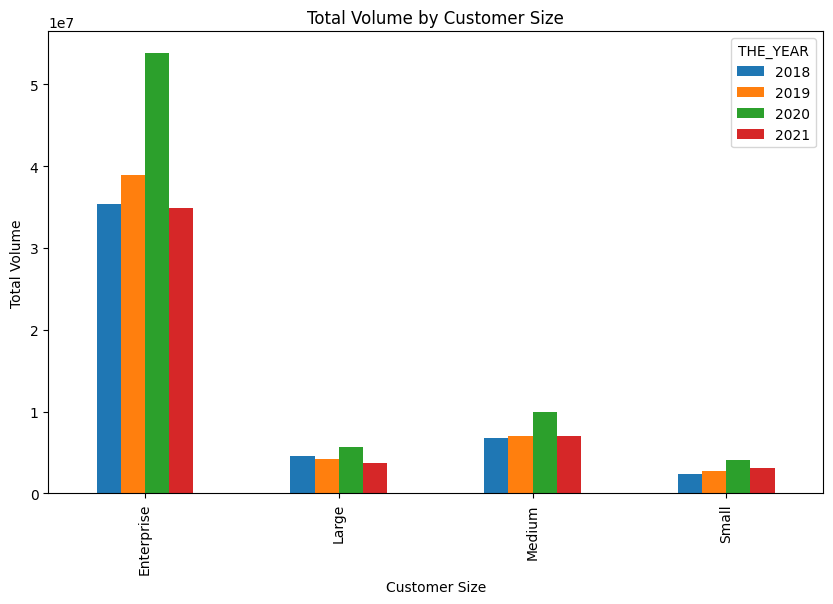

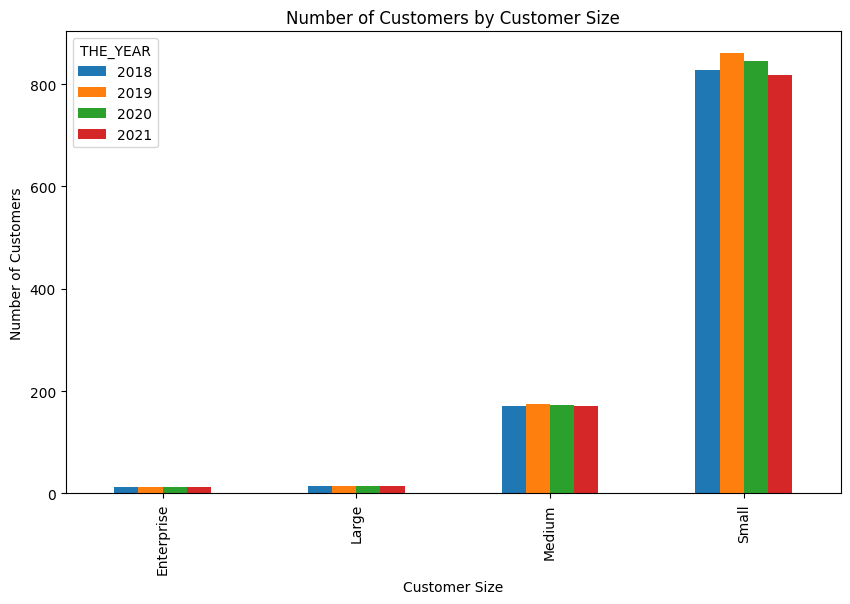

In [ ]:
# Plot the graph for CategorySize

import matplotlib.pyplot as plt
# Create a copy of the df1 dataframe
df2 = df1.copy()

# Group by CustomerSize and THE_YEAR, and calculate the sum of VOLUME and count of unique FakeCustomerID
grouped_data = df2.groupby(['CustomerSize', 'THE_YEAR']).agg(total_volume=('VOLUME', 'sum'), customer_count=('FakeCustomerID', 'nunique'))

# Pivot the grouped data to have CustomerSize as the index and THE_YEAR as columns
pivoted_data = grouped_data.pivot_table(index='CustomerSize', columns='THE_YEAR', values=['total_volume', 'customer_count'])

# Plot the double bar graph for total volume
pivoted_data['total_volume'].plot(kind='bar', title='Total Volume by Customer Size', figsize=(10, 6))
plt.xlabel('Customer Size')
plt.ylabel('Total Volume')
plt.show()

# Plot the double bar graph for customer count
pivoted_data['customer_count'].plot(kind='bar', title='Number of Customers by Customer Size', figsize=(10, 6))
plt.xlabel('Customer Size')
plt.ylabel('Number of Customers')
plt.show()


Total Volume by Customer Size:

This graph illustrates the total parcel volume associated with each customer size category across different years.
It helps visualize how parcel volumes are distributed among different customer size categories and how these distributions vary over time.
By analyzing this graph, one can identify trends in parcel volume growth or decline for each customer size category over the years.

Number of Customers by Customer Size:

This graph depicts the count of unique customers within each customer size category across different years.
It provides insights into the distribution of customers among different size categories and how this distribution evolves over time.
By examining this graph, one can observe changes in the number of customers in each size category, potentially indicating shifts in market demographics or changes in customer behavior over the years.
In summary, while the first graph focuses on parcel volume distribution, the second graph emphasizes customer count distribution. Together, they offer a comprehensive understanding of how parcel volumes and customer counts are distributed among various customer size categories, aiding in strategic decision-making and business analysis.








In [34]:
#Total number of unique FakeCustomerID in each CustomerSize category.

print(df1.groupby('CustomerSize')['FakeCustomerID'].count())

CustomerSize
Enterprise      2351
Large           2961
Medium         33067
Small         152340
Name: FakeCustomerID, dtype: int64



- **Enterprise Customers:**
  - Total volume increased significantly from 2019 to 2020.
  - Customer count remained relatively stable.
- **Large Customers:**
  - Total volume increased from 2019 to 2020, but not as significantly as Enterprise customers.
  - Customer count also increased, suggesting growth in this segment.
- **Medium Customers:**
  - Total volume experienced a slight decrease from 2019 to 2020.
  - Customer count decreased as well, indicating a potential loss of customers in this category.
- **Small Customers:**
  - Total volume decreased significantly from 2019 to 2020.
  - Customer count also decreased, suggesting a decline in activity from smaller customers.

Overall, the data suggests that larger customers (Enterprise and Large) experienced growth in terms of total volume during the COVID-19 period, while smaller customers (Medium and Small) faced challenges and decreased activity.

In [33]:
#assign a covid_observation_period variable
import pandas as pd
covid_obervation_period = pd.to_datetime(['2020-01-25', '2020-12-31'])

The pd.to_datetime() function is called to convert a list of two date strings representing the start and end dates of the COVID observation period into Pandas Timestamp objects.
The provided dates are '2020-01-25' and '2020-12-31', indicating the start and end dates of the COVID-19 pandemic observation period, respectively.
The function converts these strings into Pandas Timestamp objects, which are more suitable for handling dates in Pandas DataFrames.

In [32]:
import numpy as np
df1['Margin'] = np.nan

for i in df1['FakeCustomerID'].unique():
  if df1.loc[df1['FakeCustomerID'] == i, 'CustomerSize'].values[0] == 'Enterprise':
    df1.loc[df1['FakeCustomerID'] == i, 'Margin'] = 0.22
  elif df1.loc[df1['FakeCustomerID'] == i, 'CustomerSize'].values[0] == 'Large':
    df1.loc[df1['FakeCustomerID'] == i, 'Margin'] = 0.17
  elif df1.loc[df1['FakeCustomerID'] == i, 'CustomerSize'].values[0] == 'Medium':
    df1.loc[df1['FakeCustomerID'] == i, 'Margin'] = 0.10
  else:
    df1.loc[df1['FakeCustomerID'] == i, 'Margin'] = 0.04

df3 = df1.copy()

df3.head(10)

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME,date,CustomerSize,Margin
0,718117,2021,1,8,2021-01-04,Small,0.04
1,718117,2020,7,257,2020-02-17,Small,0.04
2,718117,2019,39,141,2019-09-30,Small,0.04
3,718117,2018,1,14,2018-01-01,Small,0.04
4,718117,2021,2,192,2021-01-11,Small,0.04
5,718117,2018,2,18,2018-01-08,Small,0.04
6,718117,2020,8,232,2020-02-24,Small,0.04
7,718117,2020,10,229,2020-03-09,Small,0.04
8,718117,2020,2,251,2020-01-13,Small,0.04
9,718117,2019,5,93,2019-02-04,Small,0.04


The resulting DataFrame df3 contains the original data along with the newly added 'Margin' column, which assigns margin values based on the customer size categories.
In summary, this code segment categorizes customers into different size categories and assigns corresponding margin values based on their categories, providing a way to analyze profit margins for different customer segments.

In [23]:
# Calculate the volume for the first 15 weeks of 2019 and 2020
vol_current_period = df3[(df3['THE_YEAR'] == 2020) & (df3['THE_WEEK'] <= 15)]['VOLUME'].sum()
vol_previous_period = df3[(df3['THE_YEAR'] == 2019) & (df3['THE_WEEK'] <= 15)]['VOLUME'].sum()

# Calculate ISGR
ISGR = (vol_current_period - vol_previous_period) / vol_previous_period

# Print ISGR value
print(f"ISGR: {ISGR}")

ISGR: 0.11401523880240338


This code calculates the Industry Standard Growth Rate (ISGR) by comparing the total parcel volume for the first 15 weeks of 2020 with the total parcel volume for the first 15 weeks of 2019.The calculated ISGR (Industry Standard Growth Rate) value is approximately 0.114, which indicates a growth rate of 11.4% when comparing the total parcel volume for the first 15 weeks of 2020 to the total parcel volume for the same period in 2019. This positive growth rate suggests an increase in parcel volume during this timeframe, reflecting potential industry expansion or changes in customer behavior.

In [31]:
import numpy as np
df3['Performance'] = np.nan

for i in df3['FakeCustomerID'].unique():
  current_period_volume = df3[(df3['FakeCustomerID'] == i) & (df3['THE_YEAR'] == 2020) & (df3['THE_WEEK'] <= 15)]['VOLUME'].sum()
  previous_period_volume = df3[(df3['FakeCustomerID'] == i) & (df3['THE_YEAR'] == 2019) & (df3['THE_WEEK'] <= 15)]['VOLUME'].sum()
  if previous_period_volume > 0:
    df3.loc[df3['FakeCustomerID'] == i, 'Performance'] = (current_period_volume - previous_period_volume) / previous_period_volume
  else:
    df3.loc[df3['FakeCustomerID'] == i, 'Performance'] = np.nan

df3.head()


,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME,date,CustomerSize,Margin,Performance,Label
0,718117,2021,1,8,2021-01-04,Small,0.04,3.153235,High Growth Customers
1,718117,2020,7,257,2020-02-17,Small,0.04,3.153235,High Growth Customers
2,718117,2019,39,141,2019-09-30,Small,0.04,3.153235,High Growth Customers
3,718117,2018,1,14,2018-01-01,Small,0.04,3.153235,High Growth Customers
4,718117,2021,2,192,2021-01-11,Small,0.04,3.153235,High Growth Customers


The resulting DataFrame df3 contains the original data along with the newly added 'Performance' column, which quantifies the performance of each customer based on parcel volume changes between the specified periods.
In summary, this code segment provides a measure of customer performance by evaluating the percentage change in parcel volume for the first 15 weeks of 2020 compared to the same period in 2019, considering each customer individually.

In [30]:
import numpy as np
df3['Performance'] = np.nan

for i in df3['FakeCustomerID'].unique():
  before_covid_volume = df3[(df3['FakeCustomerID'] == i) & (df3['THE_YEAR'] == 2019) & (df3['THE_WEEK'] <= 15)]['VOLUME'].sum()
  after_covid_volume = df3[(df3['FakeCustomerID'] == i) & (df3['THE_YEAR'] == 2020) & (df3['THE_WEEK'] <= 15)]['VOLUME'].sum()
  if before_covid_volume > 0 and after_covid_volume > 0:
    df3.loc[df3['FakeCustomerID'] == i, 'Performance'] = (after_covid_volume - before_covid_volume) / before_covid_volume

df3.head()

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME,date,CustomerSize,Margin,Performance,Label
0,718117,2021,1,8,2021-01-04,Small,0.04,3.153235,High Growth Customers
1,718117,2020,7,257,2020-02-17,Small,0.04,3.153235,High Growth Customers
2,718117,2019,39,141,2019-09-30,Small,0.04,3.153235,High Growth Customers
3,718117,2018,1,14,2018-01-01,Small,0.04,3.153235,High Growth Customers
4,718117,2021,2,192,2021-01-11,Small,0.04,3.153235,High Growth Customers


The condition before_covid_volume > 0 and after_covid_volume > 0 ensures that performance is only calculated for customers who have nonzero parcel volumes in both the pre-COVID-19 and post-COVID-19 periods.
This condition prevents potential division by zero errors and ensures that performance is calculated only when there is sufficient data for comparison.
In summary, while the previous code calculated performance based on the comparison between the first 15 weeks of 2020 and 2019, this code specifically focuses on the impact of COVID-19 by comparing parcel volumes before and after the onset of the pandemic. Additionally, it includes a condition to exclude customers with missing or insufficient data for either period.

In [26]:
import numpy as np
df3['Label'] = np.nan

for i in df3['FakeCustomerID'].unique():
  before_covid_volume = df3[(df3['FakeCustomerID'] == i) & (df3['date'] < covid_obervation_period[0])]['VOLUME'].sum()
  after_covid_volume = df3[(df3['FakeCustomerID'] == i) & (df3['date'] >= covid_obervation_period[0])]['VOLUME'].sum()
  if before_covid_volume == 0 and after_covid_volume > 1:
    df3.loc[df3['FakeCustomerID'] == i, 'Label'] = 'New Customers'
  elif before_covid_volume > 1 and after_covid_volume == 0:
    df3.loc[df3['FakeCustomerID'] == i, 'Label'] = 'Lost Customers'
  else:
    #for i in df3['FakeCustomerID'].unique():
      #before_covid_volume = df3[(df3['FakeCustomerID'] == i) & (df3['date'] < covid_obervation_period[0])]['VOLUME'].sum()
      #after_covid_volume = df3[(df3['FakeCustomerID'] == i) & (df3['date'] >= covid_obervation_period[0])]['VOLUME'].sum()
      performance = (after_covid_volume - before_covid_volume) / before_covid_volume
      if performance > ISGR:
        df3.loc[df3['FakeCustomerID'] == i, 'Label'] = 'High Growth Customers'
      elif performance >= 0 and performance <= ISGR:
        df3.loc[df3['FakeCustomerID'] == i, 'Label'] = 'Stable Customers'
      elif performance < ISGR:
        df3.loc[df3['FakeCustomerID'] == i, 'Label'] = 'Declining Customers'

df3.head()

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME,date,CustomerSize,Margin,Performance,Label
0,718117,2021,1,8,2021-01-04,Small,0.04,3.153235,High Growth Customers
1,718117,2020,7,257,2020-02-17,Small,0.04,3.153235,High Growth Customers
2,718117,2019,39,141,2019-09-30,Small,0.04,3.153235,High Growth Customers
3,718117,2018,1,14,2018-01-01,Small,0.04,3.153235,High Growth Customers
4,718117,2021,2,192,2021-01-11,Small,0.04,3.153235,High Growth Customers


Based on the comparison between before and after COVID-19 parcel volumes, it assigns labels to each customer:
'New Customers': Customers with zero parcel volume before COVID-19 and nonzero parcel volume during or after COVID-19.
'Lost Customers': Customers with nonzero parcel volume before COVID-19 and zero parcel volume during or after COVID-19.
'High Growth Customers': Customers whose parcel volume growth rate during or after COVID-19 exceeds the Industry Standard Growth Rate (ISGR).
'Stable Customers': Customers whose parcel volume growth rate during or after COVID-19 falls within the range of the ISGR.
'Declining Customers': Customers whose parcel volume growth rate during or after COVID-19 is below the ISGR.
Assign Labels to DataFrame:

It updates the 'Label' column in df3 with the assigned labels for each customer.
Output DataFrame:

The resulting DataFrame df3 contains the original data with an additional column 'Label' indicating the category of each customer based on parcel volume trends before and after COVID-19.

In [27]:

df3.to_csv('Business_Margin.csv', index=False)

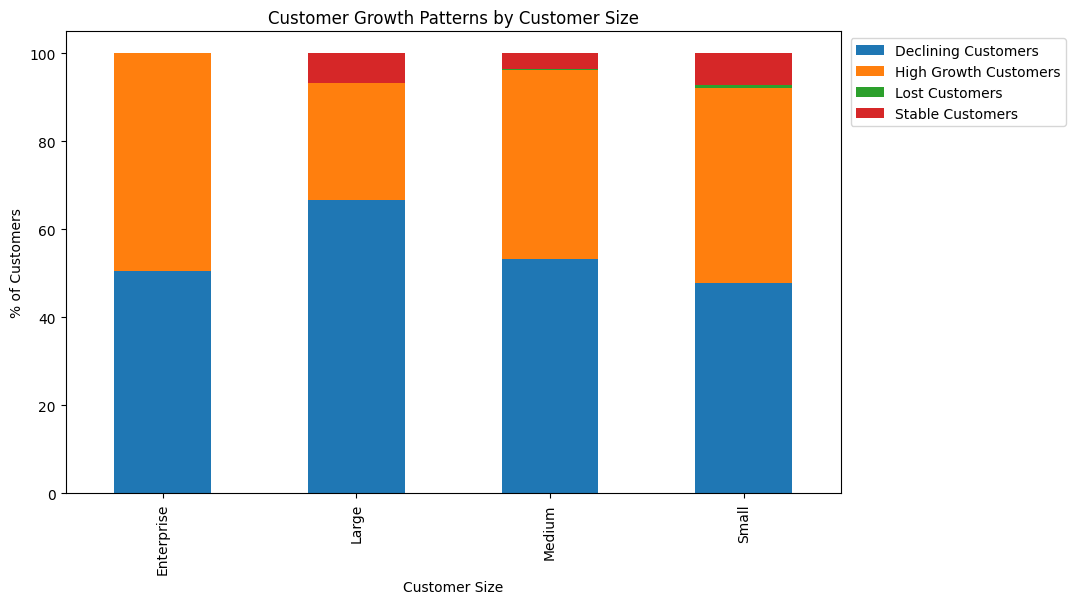

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
df = pd.read_csv('Business_Margin.csv')

# Group data by CustomerSize and Label
grouped_data = df.groupby(['CustomerSize', 'Label']).size().unstack()

# Calculate percentages
percentages = grouped_data.apply(lambda x: 100 * x / x.sum(), axis=1)

# Create stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Customer Size')
ax.set_ylabel('% of Customers')
ax.set_title('Customer Growth Patterns by Customer Size')

# Add legend outside the plot
ax.legend(bbox_to_anchor=(1.3, 1.0))

# Show the plot
plt.show()

Overall, this visualization helps to understand how customer growth patterns vary across different customer size categories, providing insights into the distribution of growth patterns within each category.

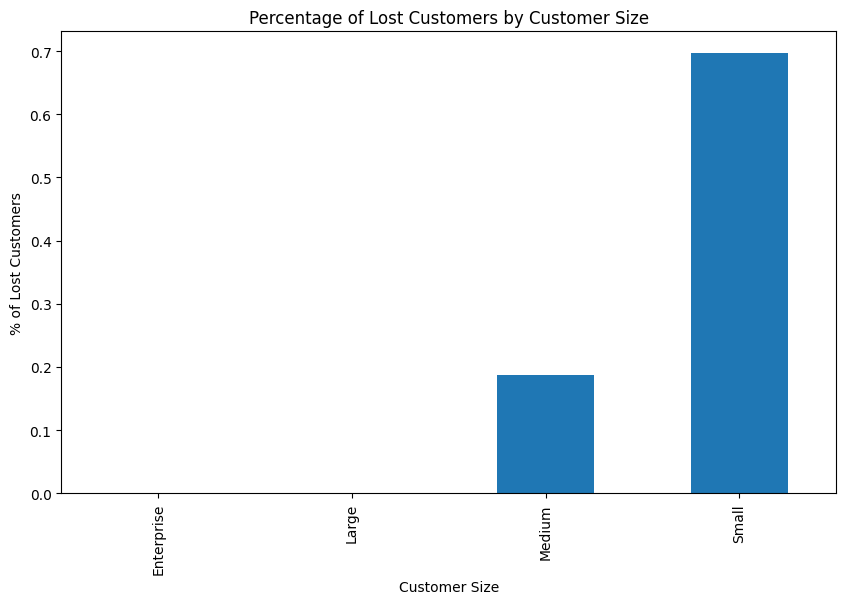

In [36]:
# Calculate the total number of customers in each CustomerSize category
total_customers = df.groupby('CustomerSize')['FakeCustomerID'].count()

# Calculate the number of lost customers in each CustomerSize category
lost_customers = df[df['Label'] == 'Lost Customers'].groupby('CustomerSize')['FakeCustomerID'].count()

# Calculate the percentage of lost customers in each CustomerSize category
percentage_lost_customers = (lost_customers / total_customers) * 100

# Create a bar chart
ax = percentage_lost_customers.plot(kind='bar', figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Customer Size')
ax.set_ylabel('% of Lost Customers')
ax.set_title('Percentage of Lost Customers by Customer Size')

# Show the plot
plt.show()

It calculates the percentage of lost customers in each CustomerSize category by dividing the number of lost customers by the total number of customers in each category and multiplying by 100.This visualization helps to understand the proportion of lost customers relative to the total number of customers within each size category, providing insights into customer retention across different customer sizes.

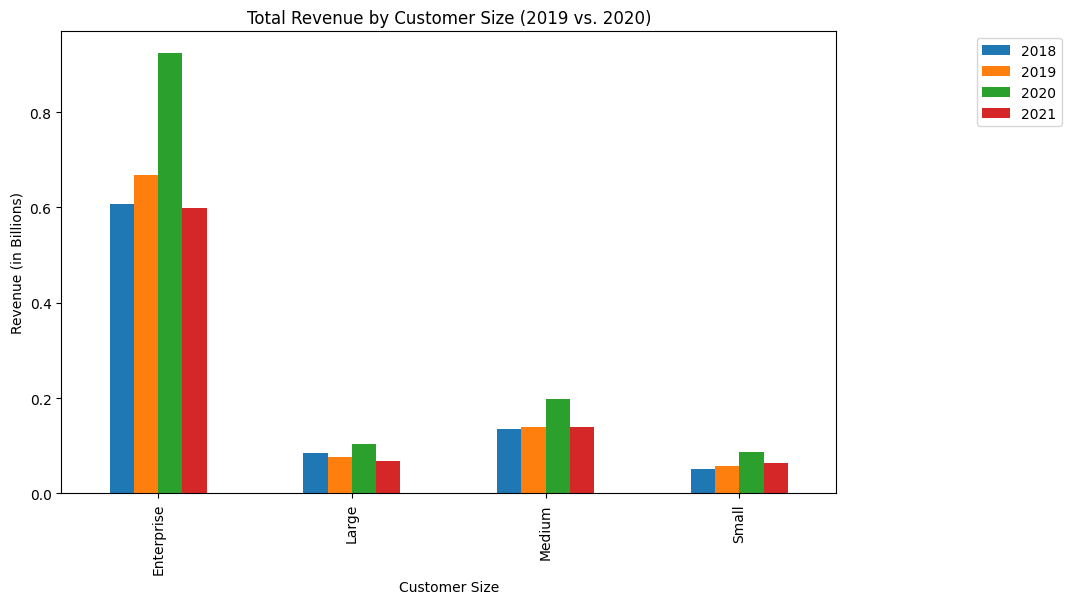

THE_YEAR          2018      2019      2020      2021
CustomerSize                                        
Enterprise    0.606265  0.667701  0.923106  0.598630
Large         0.083902  0.076539  0.102718  0.067808
Medium        0.134451  0.139146  0.197323  0.139104
Small         0.050350  0.056889  0.086391  0.064533


In [37]:
import matplotlib.pyplot as plt
df3['Revenue'] = df3['VOLUME'] * (1 - df3['Margin']) * 22
df3['Revenue_in_billions'] = df3['Revenue'] / 1000000000

# Calculate total revenue for each CustomerSize in 2019 and 2020
grouped_revenue = df3.groupby(['CustomerSize', 'THE_YEAR'])['Revenue_in_billions'].sum().unstack()

# Create clustered bar chart
ax = grouped_revenue.plot(kind='bar', figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Customer Size')
ax.set_ylabel('Revenue (in Billions)')
ax.set_title('Total Revenue by Customer Size (2019 vs. 2020)')

# Add legend outside the plot
ax.legend(bbox_to_anchor=(1.3, 1.0))

# Show the plot
plt.show()

# Print table of total revenue for each CustomerSize in 2019 and 2020
print(grouped_revenue.to_string())

This code calculates the revenue for each customer size category in 2019 and 2020 based on the provided margin and volume data. It then visualizes the total revenue for each customer size category in a clustered bar chart comparing the years 2019 and 2020. Additionally, it prints a table showing the total revenue for each customer size category in both years.

**How did the COVID-19 pandemic impact ABC Company’s parcel business?**

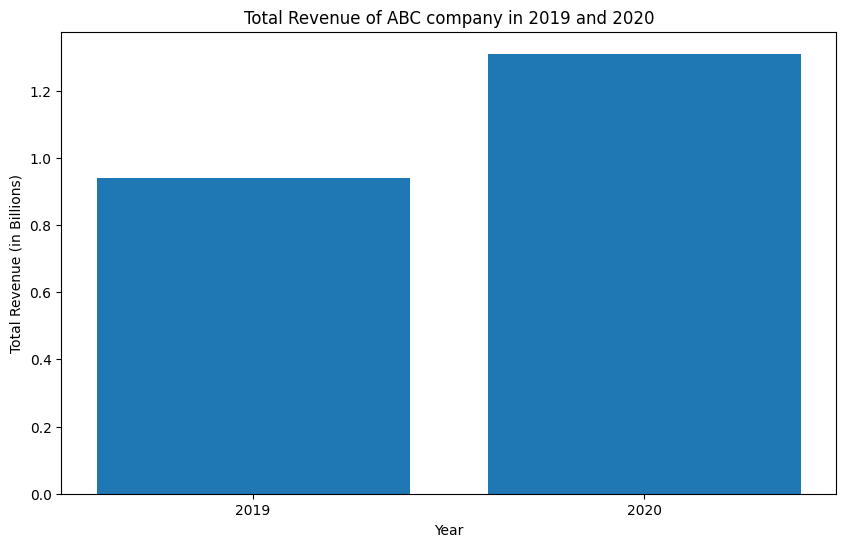

   Year  Total Revenue (in Billions)
0  2019                     0.940275
1  2020                     1.309539


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate total revenue for each year
total_revenue_2019 = df3[df3['THE_YEAR'] == 2019]['Revenue_in_billions'].sum()
total_revenue_2020 = df3[df3['THE_YEAR'] == 2020]['Revenue_in_billions'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(['2019', '2020'], [total_revenue_2019, total_revenue_2020])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Revenue (in Billions)')
plt.title('Total Revenue of ABC company in 2019 and 2020')

# Show the plot
plt.show()

# Print table of total revenue for each year
print(pd.DataFrame({'Year': [2019, 2020], 'Total Revenue (in Billions)': [total_revenue_2019, total_revenue_2020]}))

The code calculates the total revenue for the years 2019 and 2020 based on a provided DataFrame df3 containing revenue data. It then visualizes this total revenue comparison using a bar chart and prints a table showing the total revenue for each year. This provides a clear comparison of revenue between the two years, allowing for easy analysis and understanding of revenue trends over time.